In [104]:
# 1) Install the MySQL and SQLAlchemy drivers
!pip install pymysql sqlalchemy

import pandas as pd
from sqlalchemy import create_engine

db_username = "pchintad"
db_password = "chirped lila belgrade pitch"
db_name     = "I501_Spring2025_Sec27856_group01_db"
host        = "localhost"
port        = 3306

# --- create engine (SQLAlchemy 2.x compatible) ---
engine = create_engine(f"mysql+pymysql://{db_username}:{db_password}@{host}:{port}/{db_name}")

# --- read table straight into pandas (no warnings) ---
df = pd.read_sql("SELECT * FROM PF", engine)

print("Loaded DataFrame shape:", df.shape)
display(df.head())


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Loaded DataFrame shape: (80000, 22)


,mothersage,prepregnancydiabetes,gestationaldiabetes,prepregnancyhypertension,gestationalhypertension,hypertensioneclampsia,previouspretermbirth,infertilitytreatmentused,gonorrhea,syphilis,...,hepatitisC,cigbeforepregnancy,cig1sttrimester,cig2ndtrimester,cig3rdtrimester,monthprenatalcare,tobaccousage,antibiotics,steroids,target
0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,1,1,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
2,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,1,0,0
3,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
4,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0


In [105]:
# Build the engine
connection_string = f"mysql+pymysql://{db_username}:{db_password}@{host}/{db_name}"
engine = create_engine(connection_string)

# Define and run your verification query
verification_sql = """
SELECT
  cigbeforepregnancy  AS before_val,
  COUNT(*)              AS before_count
FROM PF
GROUP BY cigbeforepregnancy
UNION ALL
SELECT
  cig1sttrimester     AS before_val,
  COUNT(*)              AS before_count
FROM PF
GROUP BY cig1sttrimester
UNION ALL
SELECT
  cig2ndtrimester     AS before_val,
  COUNT(*)              AS before_count
FROM PF
GROUP BY cig2ndtrimester
UNION ALL
SELECT
  cig3rdtrimester     AS before_val,
  COUNT(*)              AS before_count
FROM PF
GROUP BY cig3rdtrimester
ORDER BY before_val;
"""

try:
    df_verify = pd.read_sql(verification_sql, engine)
    print("Verification complete — here are your 0/1 counts for each column:")
    display(df_verify)

except Exception as e:
    print("Something went wrong when running the verification query:", e)

Verification complete — here are your 0/1 counts for each column:


,before_val,before_count
0,0,79025
1,0,77746
2,0,78046
3,0,78136
4,1,975
5,1,2254
6,1,1954
7,1,1864


In [106]:
# A simple printout of dtypes:
print(df.dtypes)

# A bit more verbose (also shows non-null counts):
df.info()

mothersage                  object
prepregnancydiabetes        object
gestationaldiabetes         object
prepregnancyhypertension    object
gestationalhypertension     object
hypertensioneclampsia       object
previouspretermbirth        object
infertilitytreatmentused    object
gonorrhea                   object
syphilis                    object
chlamydia                   object
hepatitisB                  object
hepatitisC                  object
cigbeforepregnancy           int64
cig1sttrimester              int64
cig2ndtrimester              int64
cig3rdtrimester              int64
monthprenatalcare            int64
tobaccousage                 int64
antibiotics                 object
steroids                    object
target                       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 

In [107]:
# Now convert the object columns to integers
binary_cols = [
    'prepregnancydiabetes', 'gestationaldiabetes', 'prepregnancyhypertension',
    'gestationalhypertension', 'hypertensioneclampsia', 'previouspretermbirth',
    'infertilitytreatmentused', 'gonorrhea', 'syphilis', 'chlamydia',
    'hepatitisB', 'hepatitisC', 'antibiotics', 'steroids'
]

for col in binary_cols:
    df[col] = df[col].astype(int)

# Verify the conversion
print("\nData types after conversion:")
print(df.dtypes)

# Also convert mothersage if it's numeric
try:
    df['mothersage'] = pd.to_numeric(df['mothersage'])
except ValueError as e:
    print(f"\nCould not convert mothersage: {e}")


Data types after conversion:
mothersage                  object
prepregnancydiabetes         int64
gestationaldiabetes          int64
prepregnancyhypertension     int64
gestationalhypertension      int64
hypertensioneclampsia        int64
previouspretermbirth         int64
infertilitytreatmentused     int64
gonorrhea                    int64
syphilis                     int64
chlamydia                    int64
hepatitisB                   int64
hepatitisC                   int64
cigbeforepregnancy           int64
cig1sttrimester              int64
cig2ndtrimester              int64
cig3rdtrimester              int64
monthprenatalcare            int64
tobaccousage                 int64
antibiotics                  int64
steroids                     int64
target                       int64
dtype: object


In [108]:
# Convert mothersage and monthprenatalcare to numeric, coercing errors to NaN
df['mothersage'] = pd.to_numeric(df['mothersage'], errors='coerce')
df['monthprenatalcare'] = pd.to_numeric(df['monthprenatalcare'], errors='coerce')
# Verify
print(df.dtypes)


mothersage                  int64
prepregnancydiabetes        int64
gestationaldiabetes         int64
prepregnancyhypertension    int64
gestationalhypertension     int64
hypertensioneclampsia       int64
previouspretermbirth        int64
infertilitytreatmentused    int64
gonorrhea                   int64
syphilis                    int64
chlamydia                   int64
hepatitisB                  int64
hepatitisC                  int64
cigbeforepregnancy          int64
cig1sttrimester             int64
cig2ndtrimester             int64
cig3rdtrimester             int64
monthprenatalcare           int64
tobaccousage                int64
antibiotics                 int64
steroids                    int64
target                      int64
dtype: object


Mother's Age Statistics:
count    80000.000000
mean        29.619850
std          5.821045
min         13.000000
25%         25.000000
50%         30.000000
75%         34.000000
max         50.000000
Name: mothersage, dtype: float64


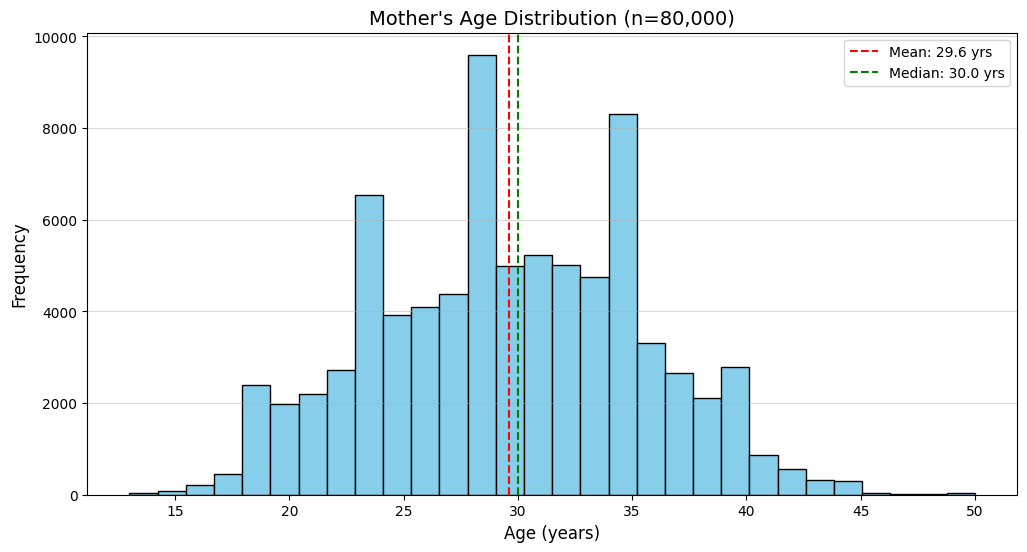


Missing values in mothersage: 0 (0.00%)


In [109]:
import matplotlib.pyplot as plt
# Convert to numeric
df['mothersage'] = pd.to_numeric(df['mothersage'], errors='coerce')

# Basic statistics
print("Mother's Age Statistics:")
print(df['mothersage'].describe())

# Plot distribution
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(df['mothersage'].dropna(), bins=30, color='skyblue', edgecolor='black')

# Add annotations
plt.title('Mother\'s Age Distribution (n=80,000)', fontsize=14)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.5)

# Highlight key statistics
mean_age = df['mothersage'].mean()
median_age = df['mothersage'].median()
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.1f} yrs')
plt.axvline(median_age, color='green', linestyle='--', label=f'Median: {median_age:.1f} yrs')
plt.legend()

plt.show()

# Count missing values
missing = df['mothersage'].isna().sum()
print(f"\nMissing values in mothersage: {missing} ({missing/len(df)*100:.2f}%)")


Prenatal Care Month Statistics:
count    80000.000000
mean         2.980837
std          1.524573
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         10.000000
Name: monthprenatalcare, dtype: float64


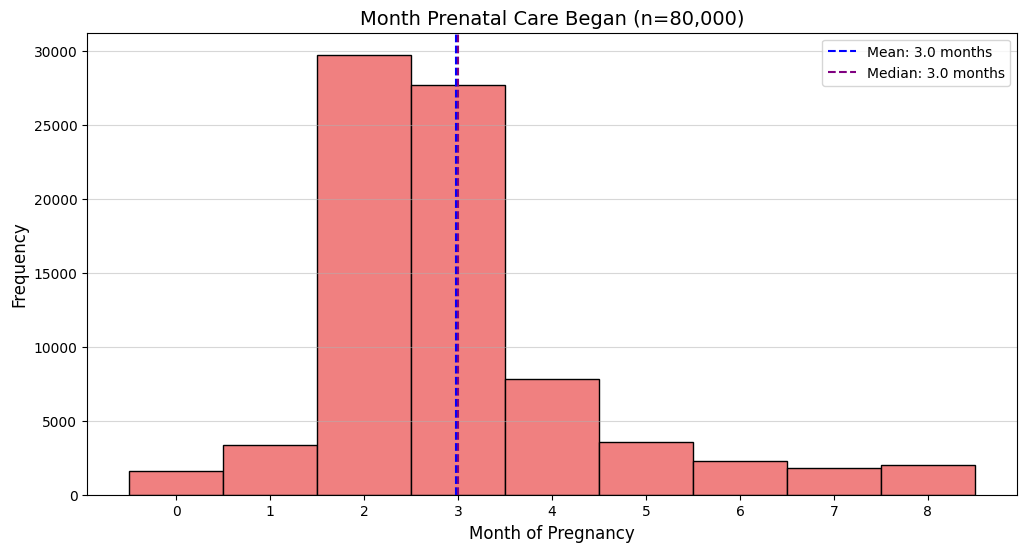


Value Counts by Month:
monthprenatalcare
0      1606
1      3361
2     29756
3     27732
4      7833
5      3597
6      2305
7      1804
8      1438
9       561
10        7
Name: count, dtype: int64

Mothers starting prenatal care after 3rd month: 17545 (21.9%)


In [110]:
df_prenatal = pd.read_sql("SELECT monthprenatalcare FROM PF", engine)

# Basic statistics 
print("\nPrenatal Care Month Statistics:")
print(df_prenatal['monthprenatalcare'].describe())

# Plot distribution
plt.figure(figsize=(12, 6))

# Using bins that make sense for months (1-9 typically)
n, bins, patches = plt.hist(df_prenatal['monthprenatalcare'], 
                           bins=range(0, 10), 
                           color='lightcoral', 
                           edgecolor='black',
                           align='left')

# Add annotations
plt.title('Month Prenatal Care Began (n=80,000)', fontsize=14)
plt.xlabel('Month of Pregnancy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 9))  # Months typically 1-9
plt.grid(axis='y', alpha=0.5)

# Highlight key statistics
mean_month = df_prenatal['monthprenatalcare'].mean()
median_month = df_prenatal['monthprenatalcare'].median()
plt.axvline(mean_month, color='blue', linestyle='--', label=f'Mean: {mean_month:.1f} months')
plt.axvline(median_month, color='purple', linestyle='--', label=f'Median: {median_month} months')
plt.legend()

plt.show()

# Value counts (shows exact counts for each month)
print("\nValue Counts by Month:")
print(df_prenatal['monthprenatalcare'].value_counts().sort_index())

# Late prenatal care analysis (starting after 3rd month)
late_care = (df_prenatal['monthprenatalcare'] > 3).sum()
print(f"\nMothers starting prenatal care after 3rd month: {late_care} ({late_care/len(df_prenatal)*100:.1f}%)")

In [111]:
with engine.connect() as conn:
    # conn is a SQLAlchemy Connection; conn.connection is the underlying DBAPI connection
    df = pd.read_sql("SELECT * FROM PF", engine)
df.head()

,mothersage,prepregnancydiabetes,gestationaldiabetes,prepregnancyhypertension,gestationalhypertension,hypertensioneclampsia,previouspretermbirth,infertilitytreatmentused,gonorrhea,syphilis,...,hepatitisC,cigbeforepregnancy,cig1sttrimester,cig2ndtrimester,cig3rdtrimester,monthprenatalcare,tobaccousage,antibiotics,steroids,target
0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,1,1,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
2,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,1,0,0
3,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
4,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0


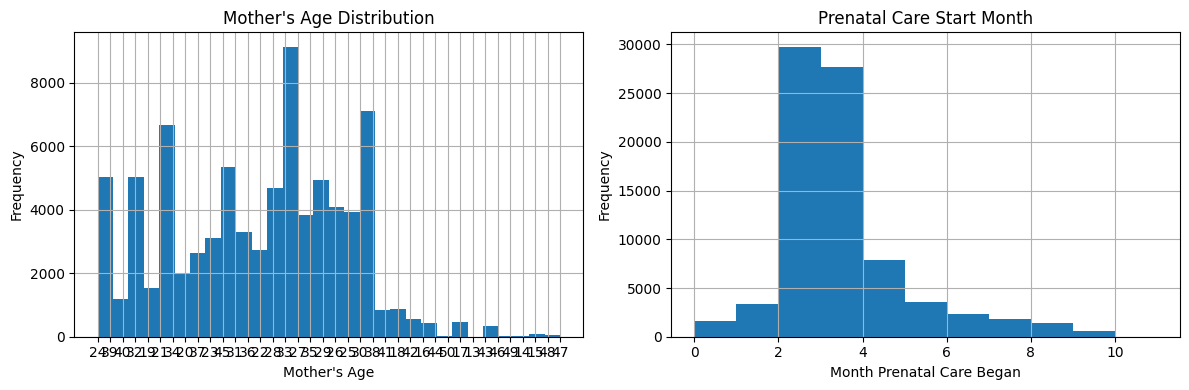

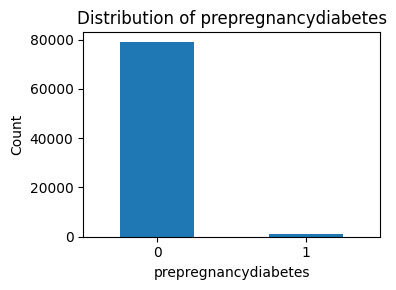

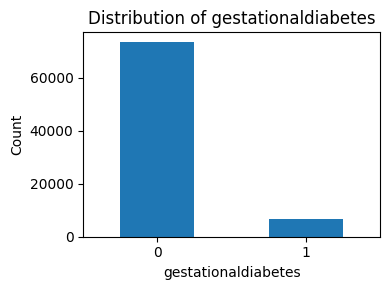

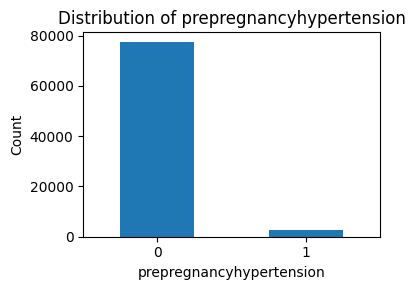

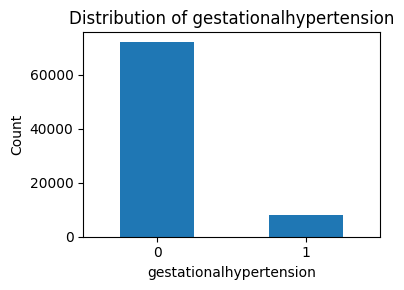

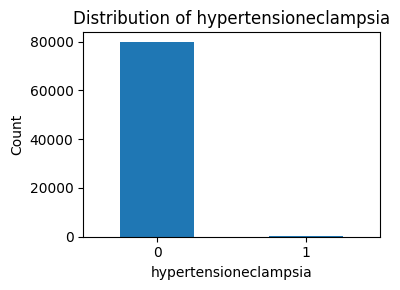

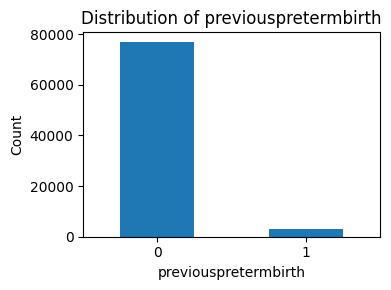

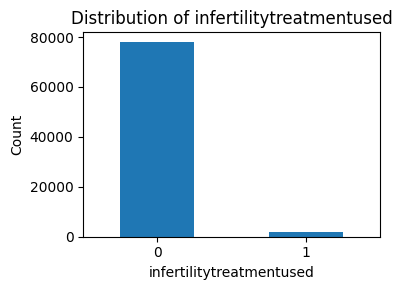

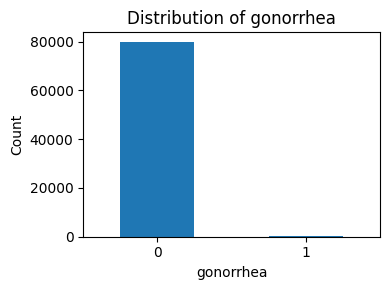

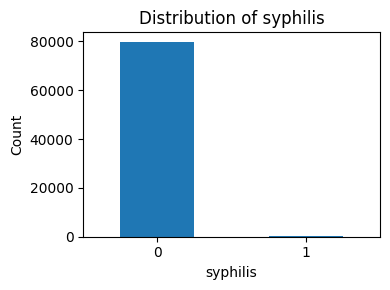

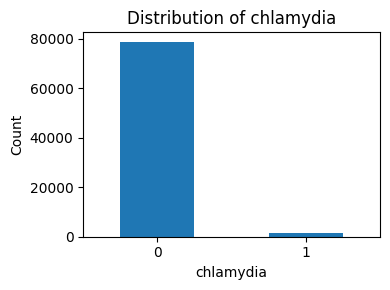

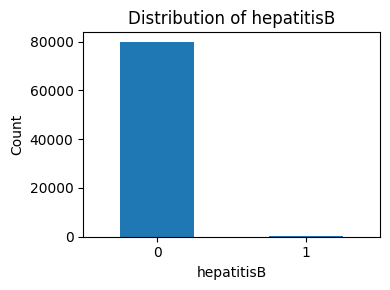

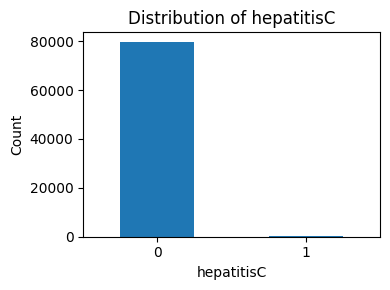

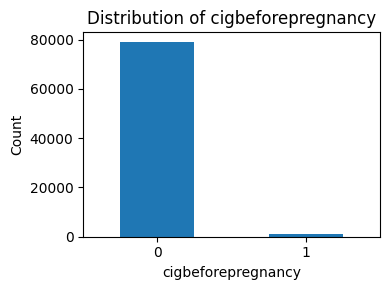

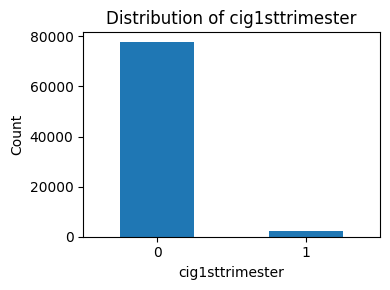

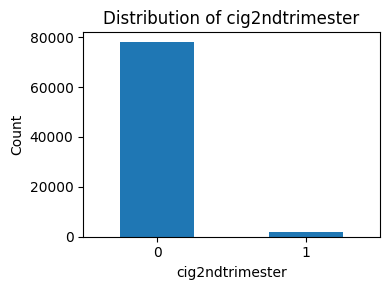

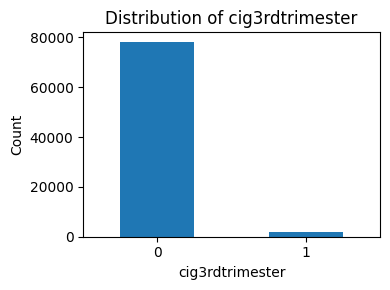

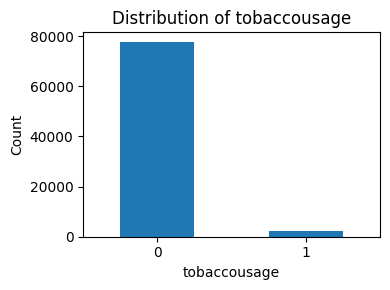

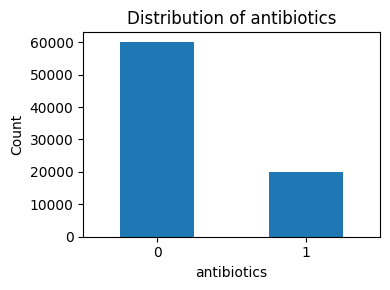

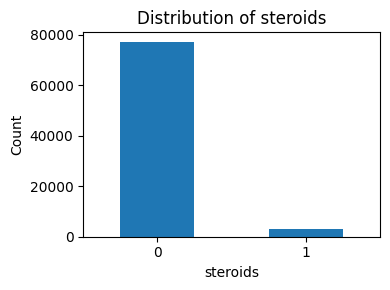

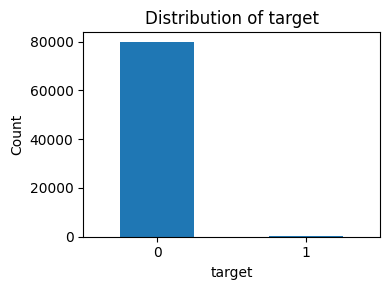

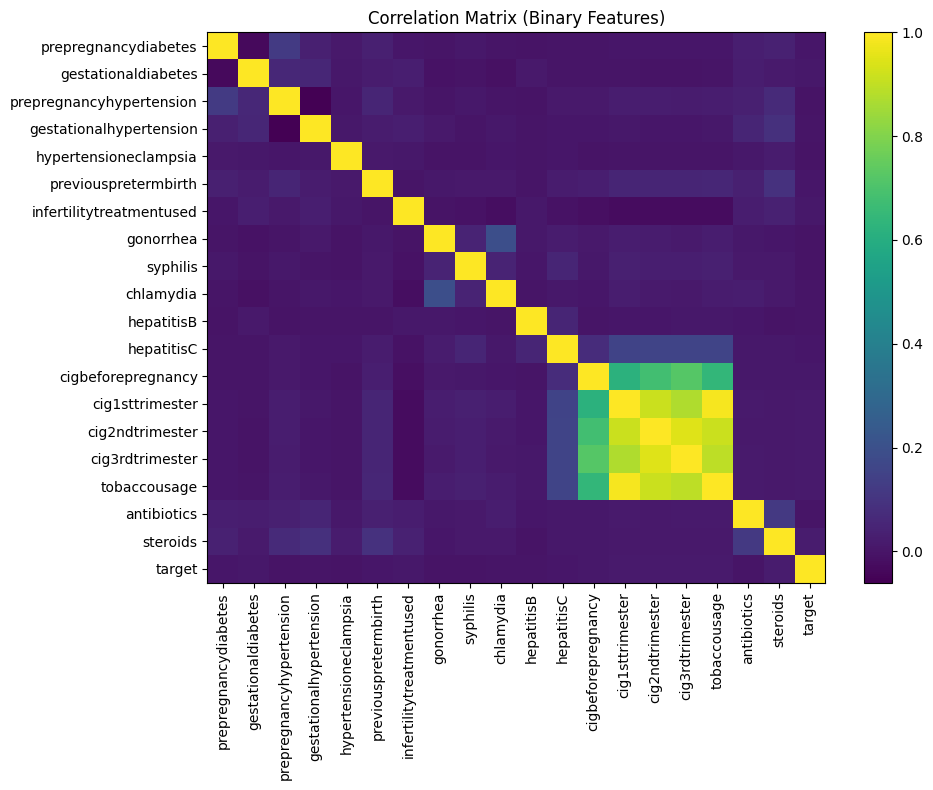

In [112]:
# Define which columns are numeric vs. binary
numeric_cols = ['mothersage', 'monthprenatalcare']
binary_cols = [c for c in df.columns if c not in numeric_cols]

# Plot histograms for your numeric features
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df['mothersage'].hist(ax=axes[0], bins=30)
axes[0].set_title("Mother's Age Distribution")
axes[0].set_xlabel("Mother's Age")
axes[0].set_ylabel("Frequency")

df['monthprenatalcare'].hist(
    ax=axes[1],
    bins=range(df['monthprenatalcare'].min(), df['monthprenatalcare'].max()+2)
)
axes[1].set_title("Prenatal Care Start Month")
axes[1].set_xlabel("Month Prenatal Care Began")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


# Bar chart for each binary variable
for col in binary_cols:
    plt.figure(figsize=(4,3))
    counts = df[col].value_counts().sort_index()
    counts.plot.bar()
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


# Correlation heatmap of binary features
import numpy as np

# build a matrix of binary features only
bin_df = df[binary_cols].astype(float)
corr = bin_df.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(binary_cols)), binary_cols, rotation=90)
plt.yticks(range(len(binary_cols)), binary_cols)
plt.title("Correlation Matrix (Binary Features)")
plt.tight_layout()
plt.show()


In [113]:
from scipy.stats import chi2_contingency

# Identify all categorical features 
cat_cols = [c for c in df.columns 
            if c not in ['mothersage','monthprenatalcare','target']]

results = []
for col in cat_cols:
    # build contingency table
    ct = pd.crosstab(df[col], df['target'])
    # run chi-square
    chi2, p, dof, _ = chi2_contingency(ct)
    results.append({
        'feature': col,
        'chi2_stat': round(chi2, 3),
        'p_value': round(p, 4),
        'dof': dof
    })

# Summarize
chi2_df = pd.DataFrame(results).sort_values('p_value').reset_index(drop=True)
print(chi2_df)


                     feature  chi2_stat  p_value  dof
0            cig3rdtrimester     19.542   0.0000    1
1            cig1sttrimester     16.951   0.0000    1
2            cig2ndtrimester     17.858   0.0000    1
3                   steroids     26.518   0.0000    1
4               tobaccousage     15.927   0.0001    1
5        gestationaldiabetes      4.818   0.0282    1
6   infertilitytreatmentused      4.447   0.0350    1
7         cigbeforepregnancy      3.028   0.0818    1
8       prepregnancydiabetes      0.981   0.3219    1
9                 hepatitisC      0.945   0.3309    1
10      previouspretermbirth      0.649   0.4205    1
11  prepregnancyhypertension      0.625   0.4290    1
12                  syphilis      0.002   0.9668    1
13               antibiotics      0.000   0.9834    1
14                 gonorrhea      0.000   1.0000    1
15   gestationalhypertension      0.000   1.0000    1
16                 chlamydia      0.000   1.0000    1
17                hepatitisB

In [114]:
df = pd.read_sql("SELECT * FROM PF", engine)
df.columns = df.columns.str.strip()

# Select all binary feature columns 
binary_cols = [
    col for col in df.columns 
    if col not in ['mothersage', 'monthprenatalcare', 'target']
]

# Run a 2×2 χ² test for each binary feature vs. target
results = []
for col in binary_cols:
    # build contingency table
    ct = pd.crosstab(df[col], df['target'])
    # only proceed if it's truly 2×2
    if ct.shape == (2, 2):
        chi2, p, dof, _ = chi2_contingency(ct)
        results.append({
            'feature': col,
            'chi2_stat': round(chi2, 3),
            'p_value': round(p, 4),
            'degrees_of_freedom': dof
        })

# Summarize and sort by significance
results_df = pd.DataFrame(results).sort_values('p_value').reset_index(drop=True)
print(results_df)


                     feature  chi2_stat  p_value  degrees_of_freedom
0            cig3rdtrimester     19.542   0.0000                   1
1            cig1sttrimester     16.951   0.0000                   1
2            cig2ndtrimester     17.858   0.0000                   1
3                   steroids     26.518   0.0000                   1
4               tobaccousage     15.927   0.0001                   1
5        gestationaldiabetes      4.818   0.0282                   1
6   infertilitytreatmentused      4.447   0.0350                   1
7         cigbeforepregnancy      3.028   0.0818                   1
8       prepregnancydiabetes      0.981   0.3219                   1
9                 hepatitisC      0.945   0.3309                   1
10      previouspretermbirth      0.649   0.4205                   1
11  prepregnancyhypertension      0.625   0.4290                   1
12                  syphilis      0.002   0.9668                   1
13               antibiotics      

In [115]:
from scipy.stats import fisher_exact

# Select all binary feature columns 
binary_cols = [
    col for col in df.columns 
    if col not in ['mothersage', 'monthprenatalcare', 'target']
]

# Perform Fisher's exact test for each binary feature vs. target
results = []
for col in binary_cols:
    table = pd.crosstab(df[col], df['target'])
    if table.shape == (2, 2):
        odds_ratio, p_value = fisher_exact(table)
        results.append({
            'feature': col,
            'odds_ratio': round(odds_ratio, 3),
            'p_value': round(p_value, 4)
        })

# Summarize and display results
results_df = pd.DataFrame(results).sort_values('p_value').reset_index(drop=True)
print(results_df)


                     feature  odds_ratio  p_value
0                   steroids       3.423   0.0000
1            cig3rdtrimester       3.556   0.0002
2            cig2ndtrimester       3.388   0.0003
3            cig1sttrimester       3.170   0.0003
4               tobaccousage       3.072   0.0004
5        gestationaldiabetes       1.698   0.0326
6   infertilitytreatmentused       2.200   0.0407
7         cigbeforepregnancy       2.509   0.0546
8                 hepatitisC       2.920   0.1531
9       prepregnancydiabetes       1.948   0.1566
10      previouspretermbirth       1.410   0.3110
11  prepregnancyhypertension       0.559   0.5011
12                 chlamydia       1.027   0.7694
13   gestationalhypertension       1.026   0.8969
14                 gonorrhea       0.000   1.0000
15     hypertensioneclampsia       0.000   1.0000
16                  syphilis       0.000   1.0000
17                hepatitisB       0.000   1.0000
18               antibiotics       0.980   1.0000


In [116]:
# ---------------------------------------------------------------
# Wilks (likelihood-ratio / G²) test for every categorical column
# ---------------------------------------------------------------
from scipy.stats import chi2_contingency
import pandas as pd

# 1) Categorical columns (same logic you used for Pearson χ²)
cat_cols = [c for c in df.columns 
            if c not in ['mothersage', 'monthprenatalcare', 'target']]

wilks_results = []

for col in cat_cols:
    # 2) Contingency table: levels of `col`  ×  target classes
    ct = pd.crosstab(df[col], df['target'])

    # 3) Wilks / likelihood-ratio statistic (lambda_ = 'log-likelihood')
    g2, p, dof, _ = chi2_contingency(
        ct,
        correction=False,           # no Yates correction for G²
        lambda_='log-likelihood'    # <-- this switches to Wilks / G test
    )

    wilks_results.append({
        'feature':  col,
        'G2_stat':  round(g2, 3),
        'p_value':  round(p, 4),
        'dof':      dof
    })

# 4) Tidy summary
wilks_df = (
    pd.DataFrame(wilks_results)
      .sort_values('p_value')
      .reset_index(drop=True)
)

print(wilks_df)


                     feature  G2_stat  p_value  dof
0                   steroids   18.655   0.0000    1
1            cig3rdtrimester   13.709   0.0002    1
2            cig2ndtrimester   12.834   0.0003    1
3            cig1sttrimester   12.524   0.0004    1
4               tobaccousage   11.949   0.0005    1
5        gestationaldiabetes    4.684   0.0304    1
6   infertilitytreatmentused    4.215   0.0401    1
7         cigbeforepregnancy    3.121   0.0773    1
8                 hepatitisC    1.641   0.2002    1
9       prepregnancydiabetes    1.415   0.2342    1
10  prepregnancyhypertension    1.209   0.2715    1
11                  syphilis    1.063   0.3025    1
12      previouspretermbirth    0.907   0.3409    1
13                 gonorrhea    0.891   0.3451    1
14     hypertensioneclampsia    0.749   0.3868    1
15                hepatitisB    0.573   0.4490    1
16               antibiotics    0.012   0.9120    1
17   gestationalhypertension    0.010   0.9208    1
18          

In [117]:
df.columns = df.columns.str.strip()

# List the binary features you tested (except mothersage & monthprenatalcare)
binary_cols = [
    'steroids',
    'cig3rdtrimester','cig2ndtrimester','cig1sttrimester',
    'tobaccousage','gestationaldiabetes',
    'infertilitytreatmentused','cigbeforepregnancy',
    'hepatitisC','prepregnancydiabetes',
    'previouspretermbirth','prepregnancyhypertension',
    'chlamydia','gestationalhypertension',
    'hepatitisB','syphilis','gonorrhea',
    'hypertensioneclampsia','antibiotics'
]

# Cramér’s V function
def cramers_v(x, y):
    ct = pd.crosstab(x, y)
    chi2 = chi2_contingency(ct, correction=False)[0]
    n = ct.values.sum()
    dof = min(ct.shape) - 1
    return np.sqrt(chi2 / (n * dof))

# Compute V for each feature
results = []
for col in binary_cols:
    v = cramers_v(df[col], df['target'])
    results.append({'feature': col, 'cramers_v': round(v, 3)})

# Build & display sorted table
cv_df = pd.DataFrame(results).sort_values('cramers_v', ascending=False).reset_index(drop=True)
print(cv_df)


                     feature  cramers_v
0                   steroids      0.019
1            cig3rdtrimester      0.017
2            cig2ndtrimester      0.016
3            cig1sttrimester      0.015
4               tobaccousage      0.015
5        gestationaldiabetes      0.008
6   infertilitytreatmentused      0.008
7         cigbeforepregnancy      0.007
8                 hepatitisC      0.006
9       prepregnancydiabetes      0.005
10      previouspretermbirth      0.004
11  prepregnancyhypertension      0.004
12                  syphilis      0.003
13                 gonorrhea      0.002
14                hepatitisB      0.002
15     hypertensioneclampsia      0.002
16                 chlamydia      0.000
17   gestationalhypertension      0.000
18               antibiotics      0.000


In [118]:
df.columns = df.columns.str.strip()

# Identify all categorical/binary columns
cat_cols = [
    col for col in df.columns 
    if (df[col].dtype == 'object' or set(df[col].dropna().unique()).issubset({0,1}))
]

# Define Cramér’s V function
def cramers_v(x, y):
    ct = pd.crosstab(x, y)
    chi2 = chi2_contingency(ct, correction=False)[0]
    n   = ct.values.sum()
    dof = min(ct.shape) - 1
    return np.sqrt(chi2 / (n * dof)) if dof > 0 else np.nan

# Compute pairwise Cramér’s V matrix
v_matrix = pd.DataFrame(
    np.zeros((len(cat_cols), len(cat_cols))),
    index=cat_cols,
    columns=cat_cols
)

for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols):
        if j >= i:  # fill upper triangle and mirror
            v = cramers_v(df[col1], df[col2])
            v_matrix.at[col1, col2] = v
            v_matrix.at[col2, col1] = v

# Display the matrix
print(v_matrix)


                          mothersage  prepregnancydiabetes  \
mothersage                  1.000000              0.054568   
prepregnancydiabetes        0.054568              1.000000   
gestationaldiabetes         0.107584              0.033608   
prepregnancyhypertension    0.071739              0.119325   
gestationalhypertension     0.024589              0.034185   
hypertensioneclampsia       0.026283              0.013758   
previouspretermbirth        0.063580              0.031630   
infertilitytreatmentused    0.190967              0.004144   
gonorrhea                   0.060916              0.001431   
syphilis                    0.022756              0.007680   
chlamydia                   0.135764              0.000385   
hepatitisB                  0.036559              0.004653   
hepatitisC                  0.027769              0.000241   
cigbeforepregnancy          0.021617              0.000155   
cig1sttrimester             0.025302              0.004024   
cig2ndtr

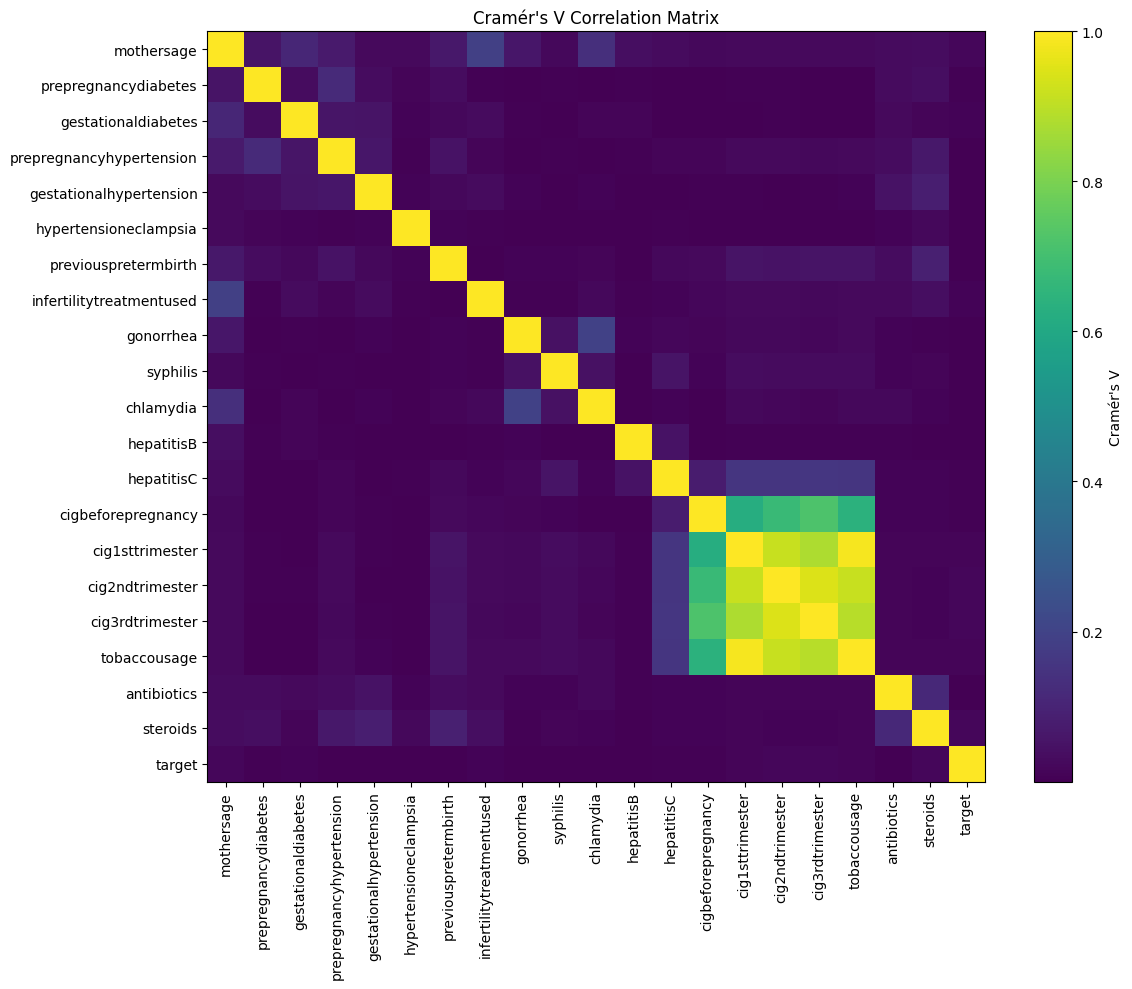

In [119]:
# Identify all categorical (object) and binary (0/1) columns
cat_cols = [
    col for col in df.columns
    if df[col].dtype == 'object'
    or set(df[col].dropna().unique()).issubset({0, 1})
]

# Define Cramér’s V
def cramers_v(x, y):
    ct   = pd.crosstab(x, y)
    chi2 = chi2_contingency(ct, correction=False)[0]
    n    = ct.values.sum()
    dof  = min(ct.shape) - 1
    return np.sqrt(chi2 / (n * dof)) if dof > 0 else np.nan

# Compute the matrix
v_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)
for c1 in cat_cols:
    for c2 in cat_cols:
        v_matrix.at[c1, c2] = cramers_v(df[c1], df[c2])

# Display heatmap
plt.figure(figsize=(12, 10))
plt.imshow(v_matrix.astype(float), aspect='auto')
plt.colorbar(label="Cramér's V")
plt.xticks(range(len(cat_cols)), cat_cols, rotation=90)
plt.yticks(range(len(cat_cols)), cat_cols)
plt.title("Cramér's V Correlation Matrix")
plt.tight_layout()
plt.show()


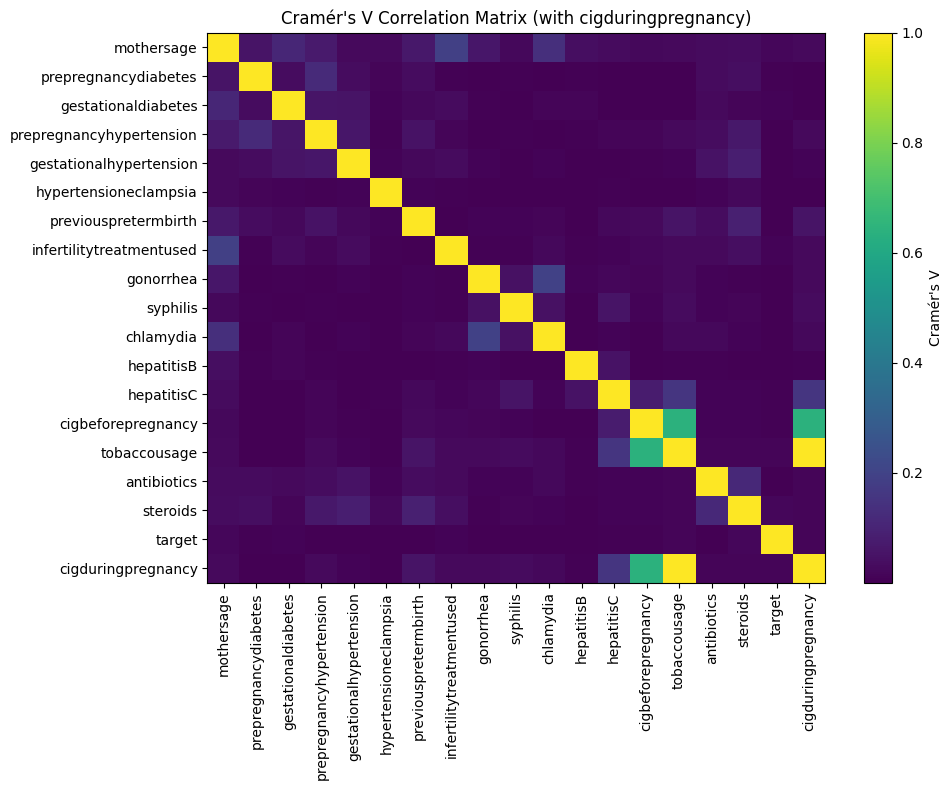

In [120]:
df.columns = df.columns.str.strip()

# Create the new 'cigduringpregnancy' flag
df['cigduringpregnancy'] = (
    df[['cig1sttrimester','cig2ndtrimester','cig3rdtrimester']]
    .any(axis=1)
    .astype(int)
)
# Drop the three old columns
df = df.drop(columns=['cig1sttrimester','cig2ndtrimester','cig3rdtrimester'])


# Re-identify your categorical/binary columns
cat_cols = [
    col for col in df.columns
    if set(df[col].dropna().unique()).issubset({0,1})
    or df[col].dtype == 'object'
]
# Cramér’s V function
def cramers_v(x, y):
    ct = pd.crosstab(x, y)
    chi2 = chi2_contingency(ct, correction=False)[0]
    n   = ct.values.sum()
    dof = min(ct.shape) - 1
    return np.sqrt(chi2 / (n * dof)) if dof > 0 else np.nan

# Compute the new Cramér’s V matrix
v_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)
for c1 in cat_cols:
    for c2 in cat_cols:
        v_matrix.at[c1, c2] = cramers_v(df[c1], df[c2])

# Plot heatmap
plt.figure(figsize=(10,8))
plt.imshow(v_matrix.astype(float), aspect='auto', cmap='viridis')
plt.colorbar(label="Cramér's V")
plt.xticks(range(len(cat_cols)), cat_cols, rotation=90)
plt.yticks(range(len(cat_cols)), cat_cols)
plt.title("Cramér's V Correlation Matrix (with cigduringpregnancy)")
plt.tight_layout()
plt.show()


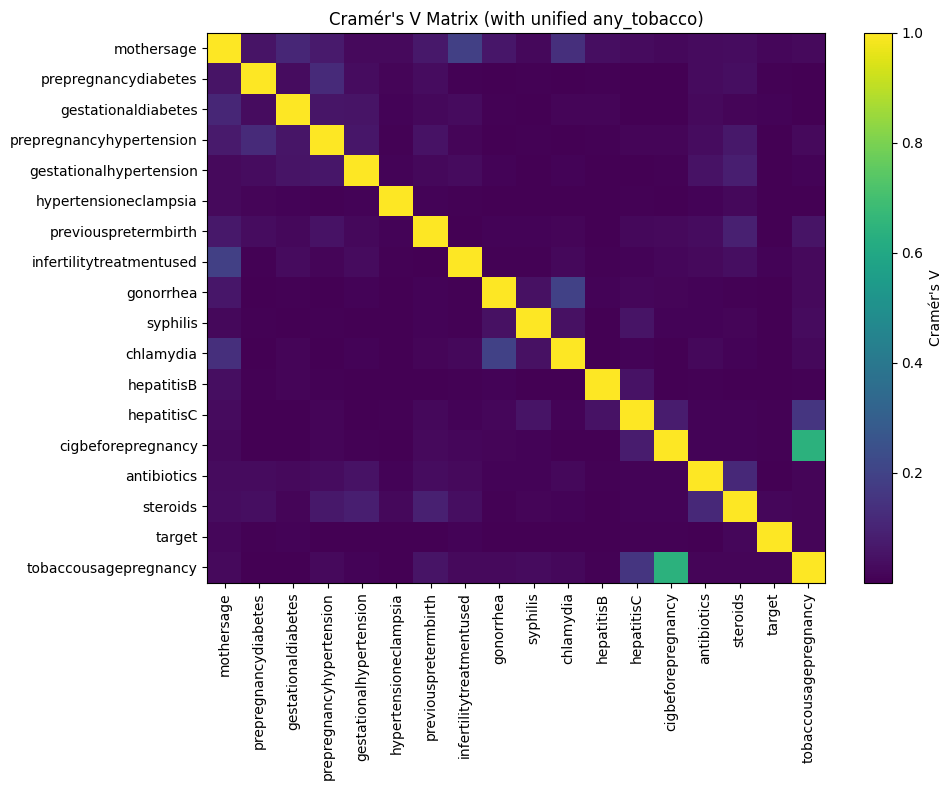

In [121]:
df.columns = df.columns.str.strip()

# Create unified tobacco flag
df['tobaccousagepregnancy'] = (
    df['cigduringpregnancy'].fillna(0).astype(int)
    | df['tobaccousage'].fillna(0).astype(int)
)
# Drop old smoking columns
df = df.drop(columns=[
    # 'cig1sttrimester','cig2ndtrimester','cig3rdtrimester',
    'cigduringpregnancy','tobaccousage'
])
# Identify categorical/binary columns
cat_cols = [
    col for col in df.columns
    if set(df[col].dropna().unique()).issubset({0,1})
    or df[col].dtype == 'object'
]
# Cramér’s V function
def cramers_v(x, y):
    ct = pd.crosstab(x, y)
    chi2 = chi2_contingency(ct, correction=False)[0]
    n    = ct.values.sum()
    dof  = min(ct.shape) - 1
    return np.sqrt(chi2/(n*dof)) if dof>0 else np.nan

# Compute V matrix
v_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)
for c1 in cat_cols:
    for c2 in cat_cols:
        v_matrix.at[c1, c2] = cramers_v(df[c1], df[c2])

# Plot heatmap
plt.figure(figsize=(10,8))
plt.imshow(v_matrix.astype(float), aspect='auto', cmap='viridis')
plt.colorbar(label="Cramér's V")
plt.xticks(range(len(cat_cols)), cat_cols, rotation=90)
plt.yticks(range(len(cat_cols)), cat_cols)
plt.title("Cramér's V Matrix (with unified any_tobacco)")
plt.tight_layout()
plt.show()


Pearson correlation: r = -0.067, p = 1.71e-79


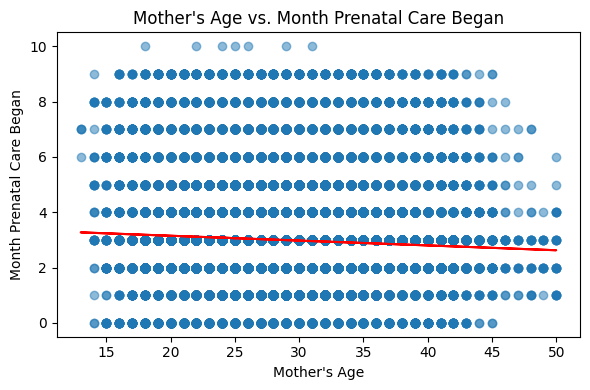

In [122]:
from scipy.stats import pearsonr

# Replace df_pf with your DataFrame variable if different
PF = pd.read_csv("PF.csv")
df = PF.copy()

# Make sure the two columns are numeric
df['mothersage'] = pd.to_numeric(df['mothersage'], errors='coerce')
df['monthprenatalcare'] = pd.to_numeric(df['monthprenatalcare'], errors='coerce')

# Drop any rows where one of them is missing
df2 = df.dropna(subset=['mothersage','monthprenatalcare'])

# Compute Pearson’s r and p‑value
r, p = pearsonr(df2['mothersage'], df2['monthprenatalcare'])
print(f"Pearson correlation: r = {r:.3f}, p = {p:.3g}")

# Scatter plot + regression line
plt.figure(figsize=(6,4))
plt.scatter(df2['mothersage'], df2['monthprenatalcare'], alpha=0.5)
m, b = np.polyfit(df2['mothersage'], df2['monthprenatalcare'], 1)
plt.plot(df2['mothersage'], m*df2['mothersage']+b, color='red')
plt.title("Mother's Age vs. Month Prenatal Care Began")
plt.xlabel("Mother's Age")
plt.ylabel("Month Prenatal Care Began")
plt.tight_layout()
plt.show()


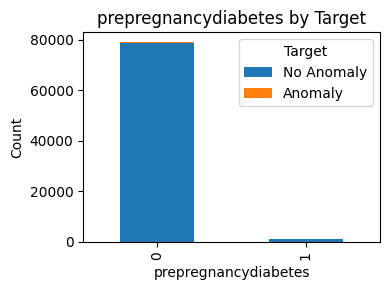

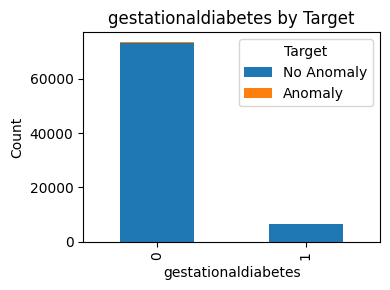

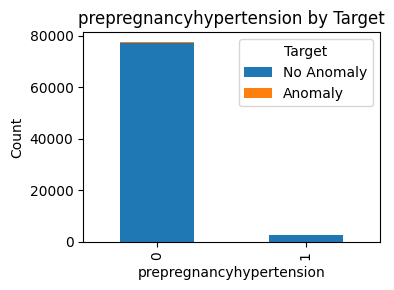

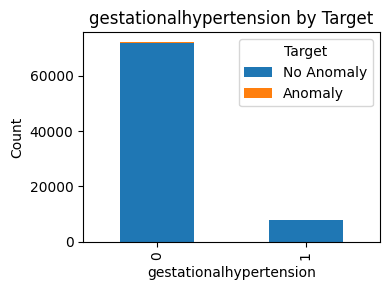

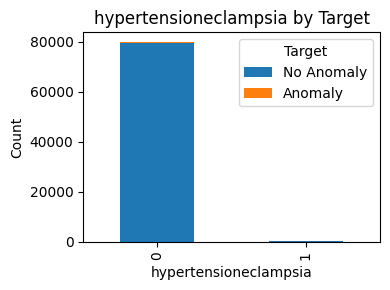

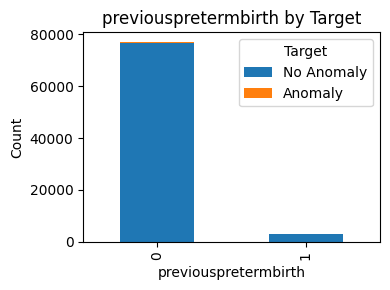

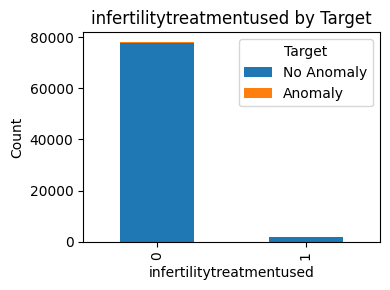

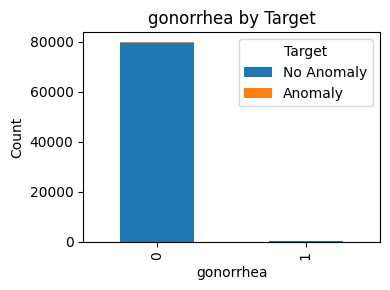

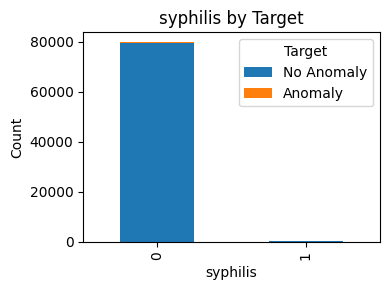

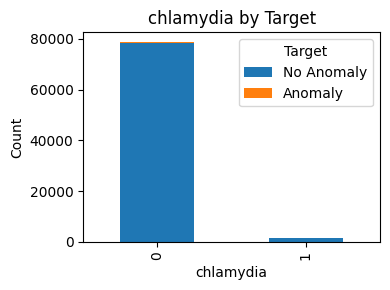

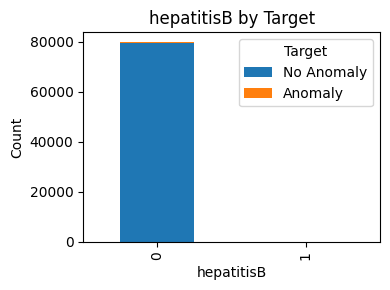

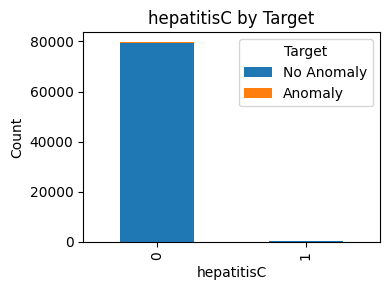

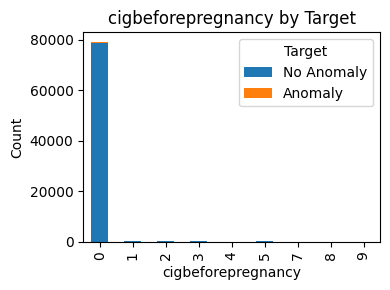

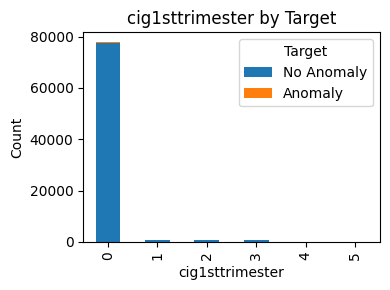

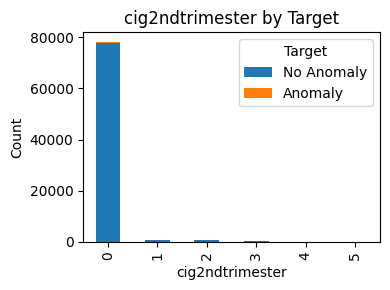

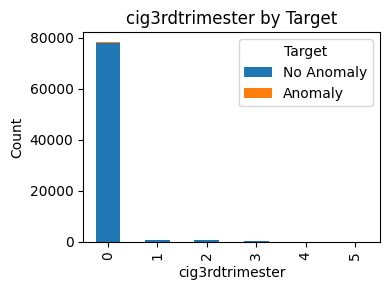

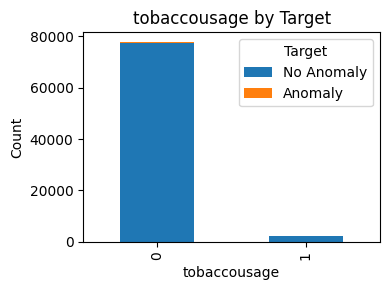

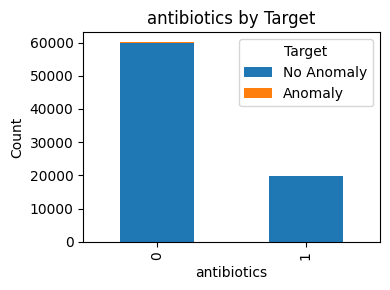

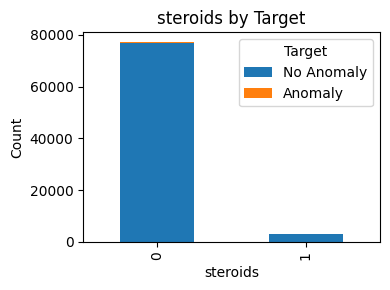

In [123]:
df.columns = df.columns.str.strip()
df_copy=df

# Identify all feature columns except mothersage, monthprenatalcare, and target
features = [c for c in df.columns if c not in ['mothersage','monthprenatalcare','target']]

# For each binary feature, plot its breakdown by target
for col in features:
    ct = pd.crosstab(df[col], df['target'])
    fig, ax = plt.subplots(figsize=(4,3))
    ct.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f"{col} by Target")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.legend(["No Anomaly","Anomaly"], title="Target")
    plt.tight_layout()
    plt.show()


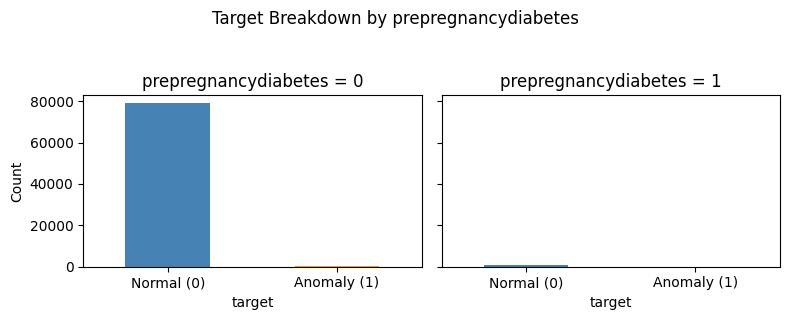

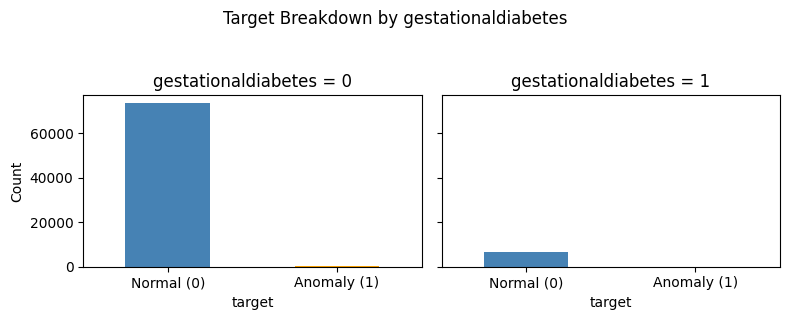

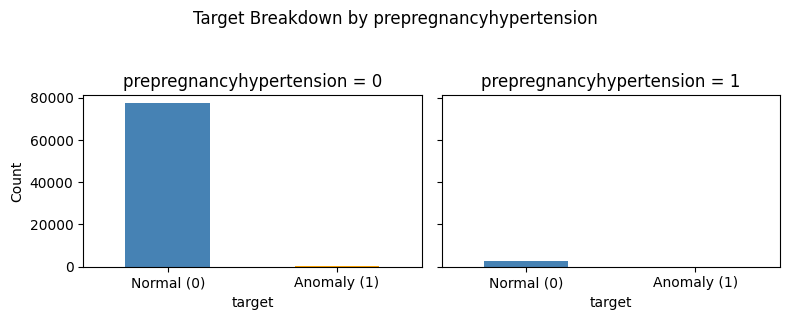

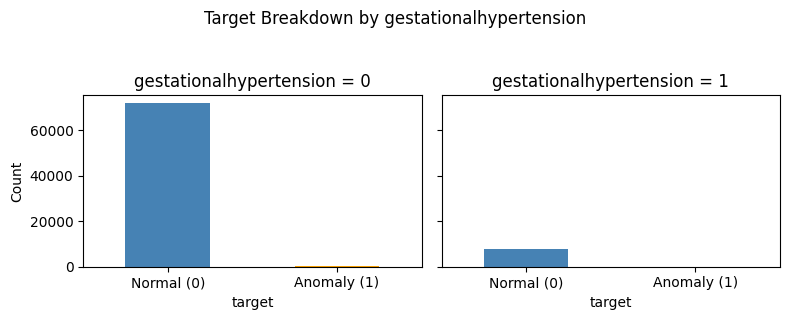

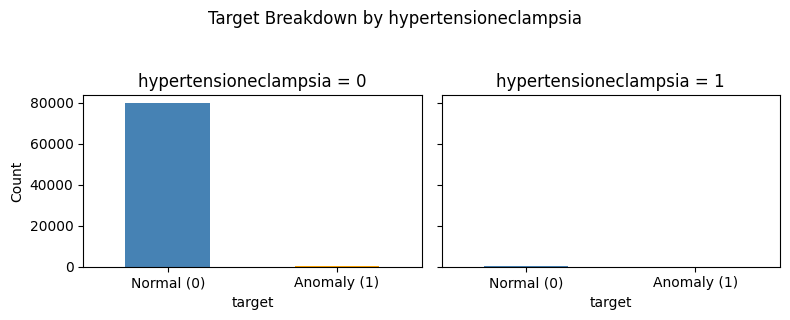

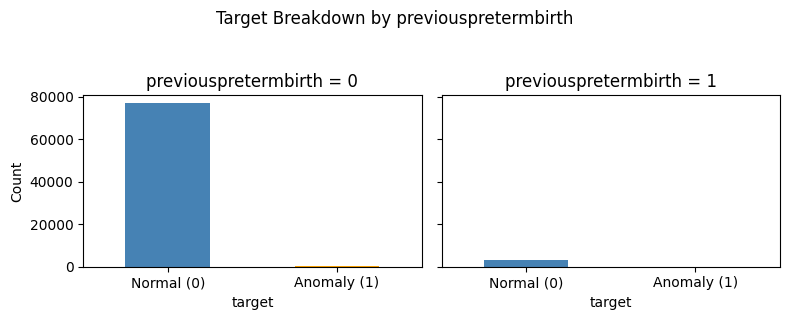

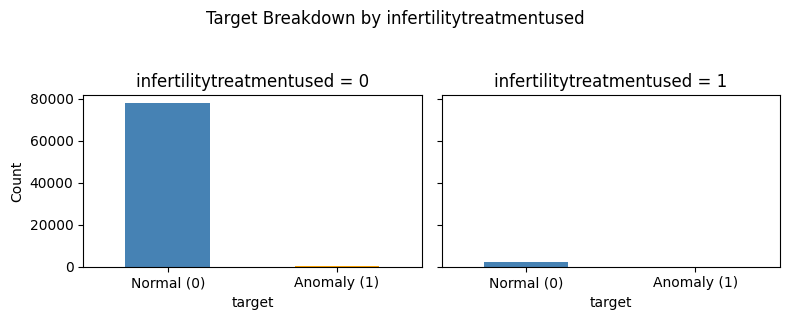

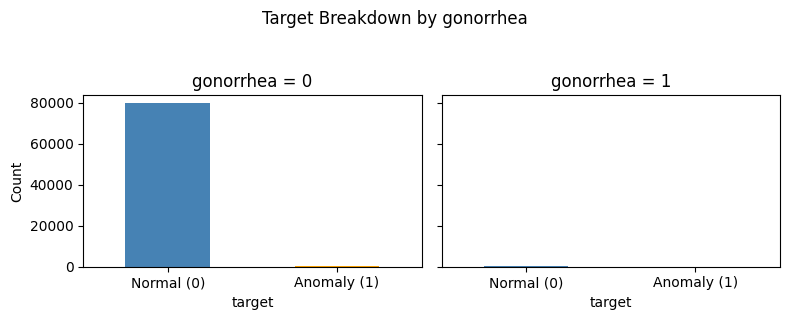

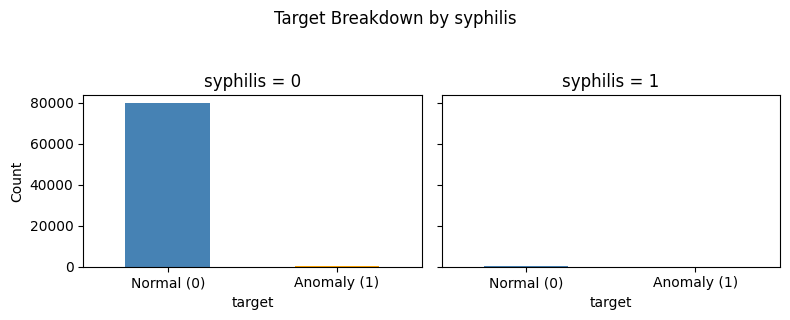

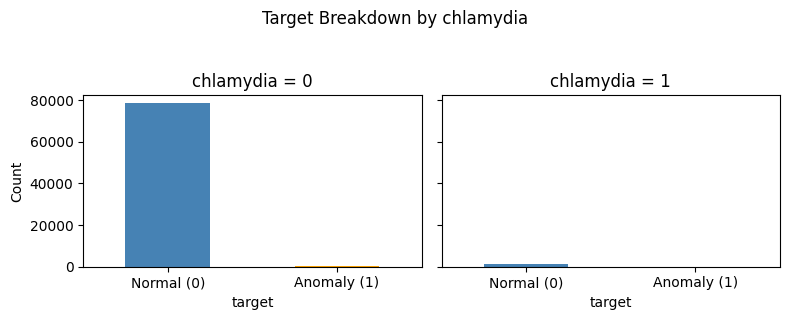

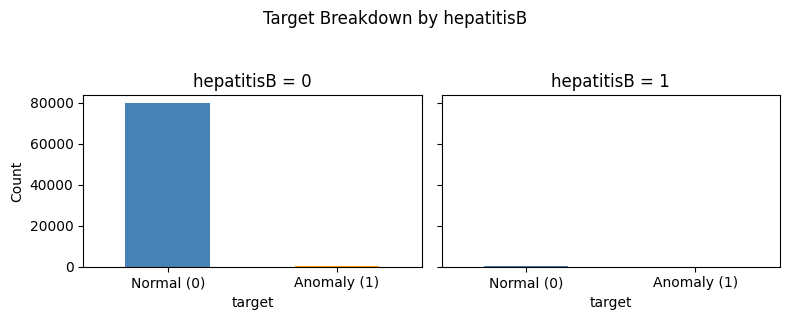

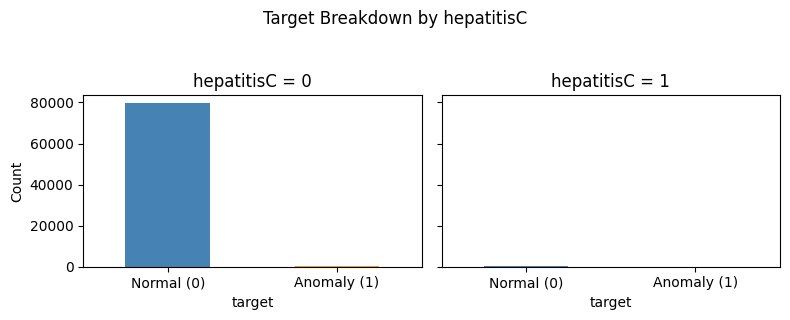

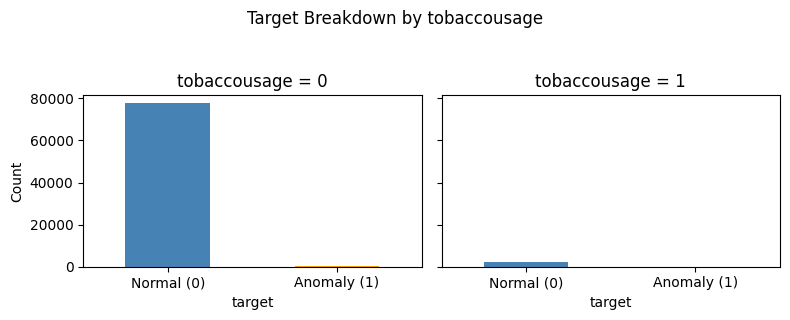

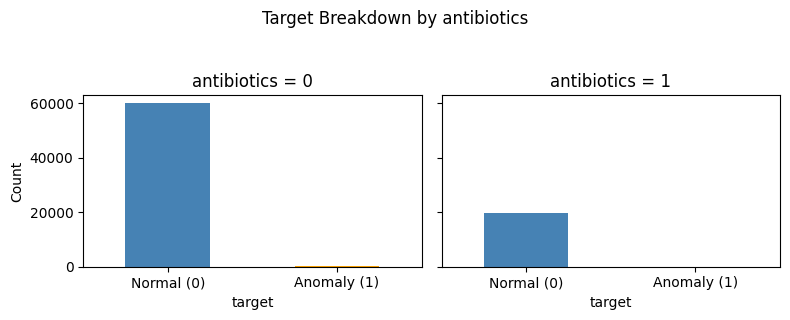

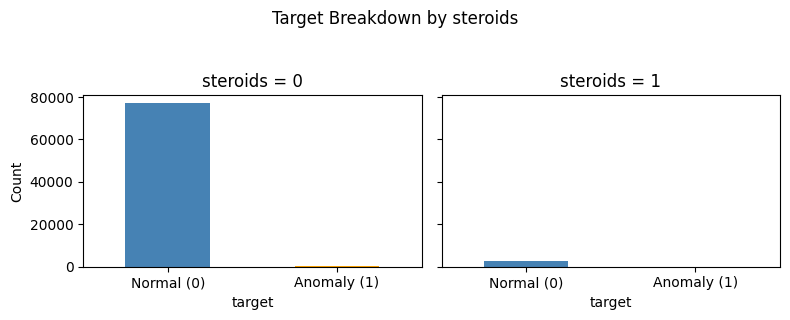

In [124]:
df.columns = df.columns.str.strip()

# Identify binary feature columns (0/1), excluding age, prenatal month, target
features = [
    col for col in df.columns
    if col not in ('mothersage', 'monthprenatalcare', 'target')
    and set(df[col].dropna().unique()).issubset({0,1})
]

# Plot counts of Normal (0) vs Anomaly (1) at feature=0 and feature=1
for col in features:
    fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
    for ax, val in zip(axes, [0, 1]):
        # count how many 0/1 targets among rows where feature == val
        counts = df.loc[df[col] == val, 'target'].value_counts().reindex([0,1], fill_value=0)
        counts.plot.bar(
            ax=ax,
            color=['steelblue', 'orange']
        )
        ax.set_title(f"{col} = {val}")
        ax.set_xticklabels(['Normal (0)', 'Anomaly (1)'], rotation=0)
        ax.set_ylabel("Count")
    fig.suptitle(f"Target Breakdown by {col}", y=1.05)
    plt.tight_layout()
    plt.show()


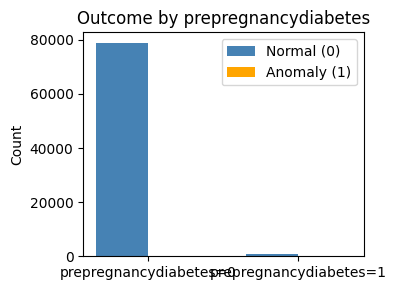

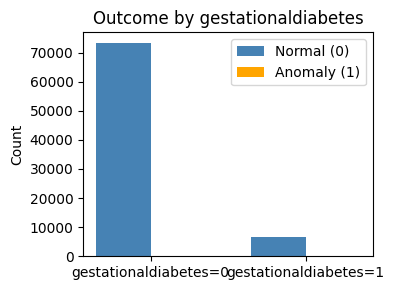

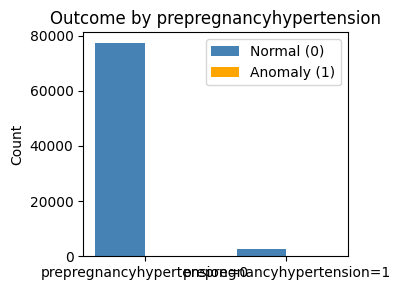

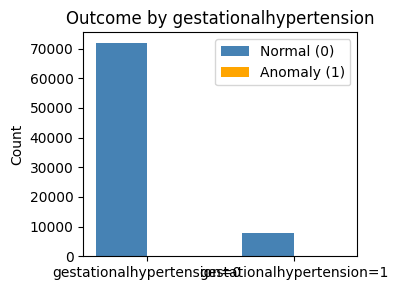

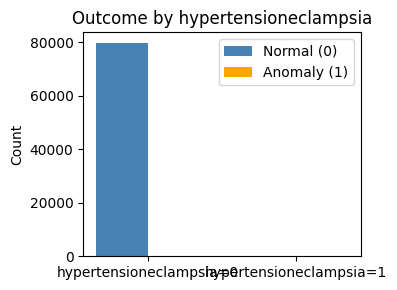

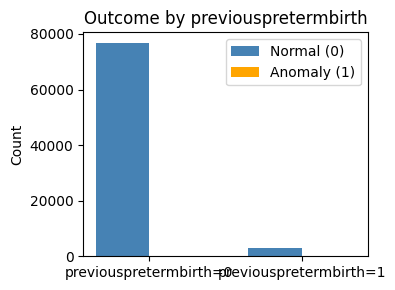

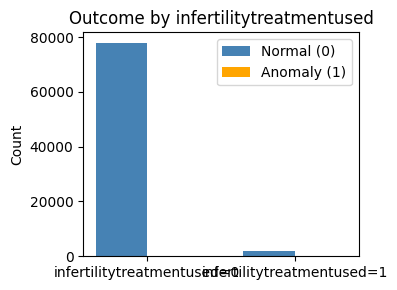

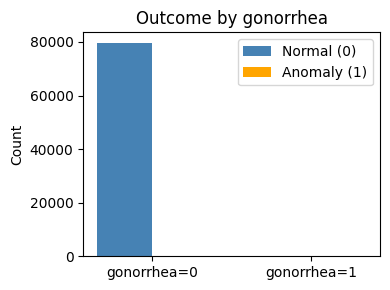

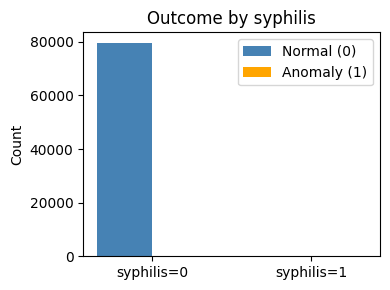

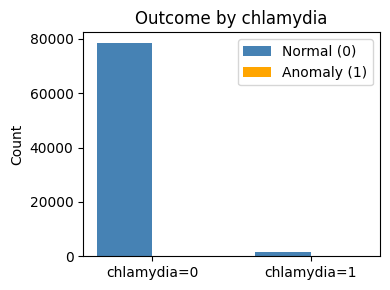

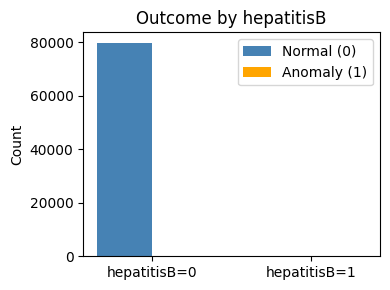

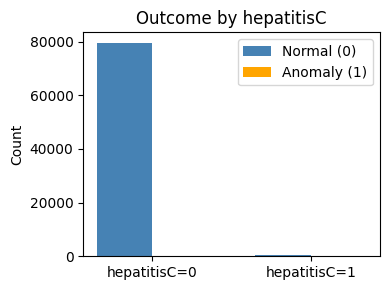

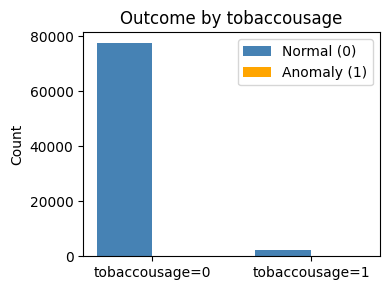

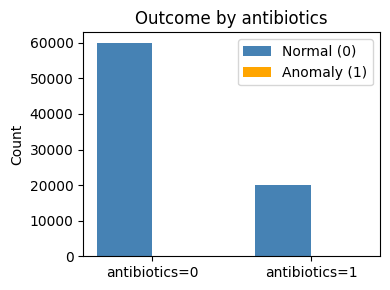

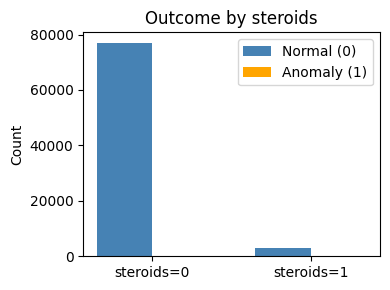

In [125]:
df.columns = df.columns.str.strip()

# 2) Identify truly binary features (0/1), excluding the two you mentioned
binary_cols = [
    col for col in df.columns 
    if col not in ('mothersage','monthprenatalcare','target')
    and set(df[col].dropna().unique()).issubset({0,1})
]

# 3) Plot per-feature Normal vs Anomaly counts
for col in binary_cols:
    fig, ax = plt.subplots(figsize=(4,3))
    # build a 2×2 table: index = feature value (0/1), columns = target (0/1)
    table = pd.crosstab(df[col], df['target']).reindex(index=[0,1], columns=[0,1], fill_value=0)
    
    # plot side-by-side bars
    width = 0.35
    x = [0,1]
    ax.bar([i-width/2 for i in x], table[0], width, color='steelblue', label='Normal (0)')
    ax.bar([i+width/2 for i in x], table[1], width, color='orange',    label='Anomaly (1)')
    
    ax.set_xticks(x)
    ax.set_xticklabels([f"{col}=0", f"{col}=1"], rotation=0)
    ax.set_ylabel("Count")
    ax.set_title(f"Outcome by {col}")
    ax.legend()
    plt.tight_layout()
    plt.show()


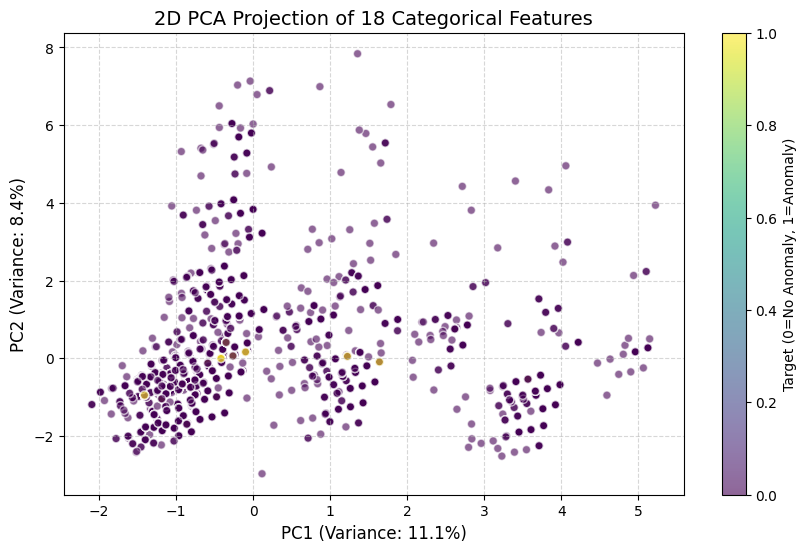

In [100]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Prepare data 
X = df[features].astype(float) 
y = df['target']

# 2. Standardize and apply PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Plot PCA components colored by target
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap='viridis', alpha=0.6, edgecolors='w'
)
plt.title("2D PCA Projection of 18 Categorical Features", fontsize=14)
plt.xlabel(f"PC1 (Variance: {pca.explained_variance_ratio_[0]:.1%})", fontsize=12)
plt.ylabel(f"PC2 (Variance: {pca.explained_variance_ratio_[1]:.1%})", fontsize=12)
plt.colorbar(scatter, label='Target (0=No Anomaly, 1=Anomaly)')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

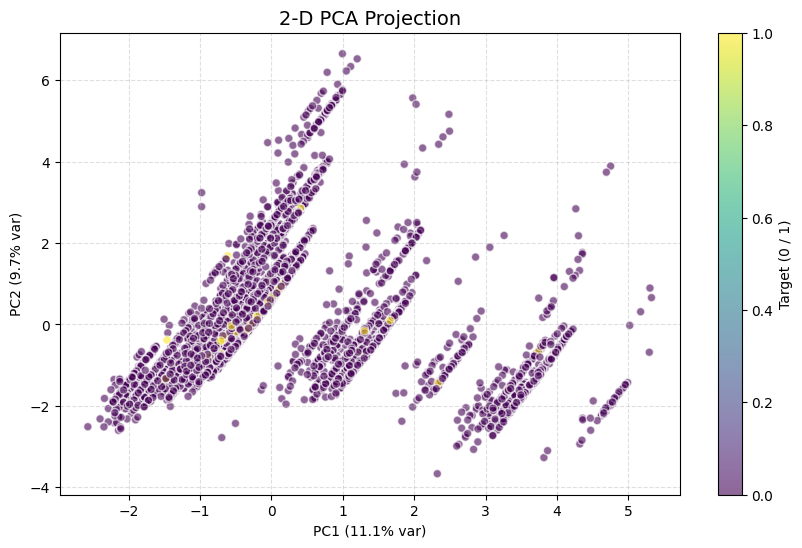

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# 0 — make sure the same feature list is in play
features = [
    'mothersage', 'prepregnancydiabetes', 'gestationaldiabetes',
    'prepregnancyhypertension', 'gestationalhypertension', 'hypertensioneclampsia',
    'previouspretermbirth', 'infertilitytreatmentused', 'gonorrhea', 'syphilis',
    'chlamydia', 'hepatitisB', 'hepatitisC', 'cigbeforepregnancy',
    'tobaccousagepregnancy', 'monthprenatalcare'
]

X = df[features].astype(float).copy()   # MUST have identical rows & cols
y = df['target'].copy()

# 1 — standardise
X_scaled = StandardScaler().fit_transform(X)

# 2 — deterministic PCA
pca = PCA(n_components=2, svd_solver='full')   # or randomized, random_state=42
X_pca = pca.fit_transform(X_scaled)

# 3 — plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y,
                      cmap='viridis', alpha=0.6, edgecolors='w')
plt.title("2‑D PCA Projection", fontsize=14)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.colorbar(scatter, label='Target (0 / 1)')
plt.grid(ls='--', alpha=0.4)
plt.show()


## working final

## working final

In [88]:
# Imports
import pandas as pd
from sqlalchemy import create_engine

# Your MySQL credentials
db_username = 'pchintad'
db_password = 'chirped lila belgrade pitch'
db_name     = 'I501_Spring2025_Sec27856_group01_db'
host        = 'localhost'
port        = 3306

# Create the SQLAlchemy engine
engine = create_engine(
    f"mysql+pymysql://{db_username}:{db_password}@{host}:{port}/{db_name}"
)

# Query inside a .connect() context so that pandas 2.2+ sees a raw DBAPI connection
query = "SELECT * FROM PF"
df = pd.read_sql(query, engine)

# Inspect the loaded DataFrame
print("Loaded DataFrame shape:", df.shape)
display(df.head())


Loaded DataFrame shape: (80000, 22)


,mothersage,prepregnancydiabetes,gestationaldiabetes,prepregnancyhypertension,gestationalhypertension,hypertensioneclampsia,previouspretermbirth,infertilitytreatmentused,gonorrhea,syphilis,...,hepatitisC,cigbeforepregnancy,cig1sttrimester,cig2ndtrimester,cig3rdtrimester,monthprenatalcare,tobaccousage,antibiotics,steroids,target
0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,1,1,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
2,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,1,0,0
3,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
4,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0


In [89]:

# 2. Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import (roc_auc_score, average_precision_score, accuracy_score,
                             precision_score, recall_score, f1_score, confusion_matrix, 
                             classification_report)
from sklearn.inspection import permutation_importance

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

import shap
import matplotlib.pyplot as plt

df = pd.read_sql("SELECT * FROM PF", engine)
df.head()
##### Feature Engineering #####
df['cigduringpregnancy'] = (
    df[['cig1sttrimester','cig2ndtrimester','cig3rdtrimester']]
    .any(axis=1)
    .astype(int)
)
df['tobaccousagepregnancy'] = (
    df['cigduringpregnancy'].fillna(0).astype(int)
    | df['tobaccousage'].fillna(0).astype(int)
)
df = df.drop(columns=[
    'cig1sttrimester','cig2ndtrimester','cig3rdtrimester',
    'cigduringpregnancy','tobaccousage'
])

# Handle binary object columns
binary_obj_cols = [c for c in df.columns if df[c].dtype == 'object' and set(df[c].unique()) <= {0,1,'0','1'}]
for col in binary_obj_cols:
    df[col] = df[col].astype(int)

# Convert mothersage to integer
if df['mothersage'].dtype != 'int64':
    df['mothersage'] = pd.to_numeric(df['mothersage'], errors='coerce').astype('int64')

# Ensure integer columns
int_cols = ['cigbeforepregnancy', 'monthprenatalcare', 'target']
for col in int_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

df.drop_duplicates(inplace=True)

# Split data into features and target
y = df['target']
X = df.drop(columns=['target']).copy()

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define numeric vs binary features
numeric_cols = [c for c in X.columns if X[c].nunique() > 10]
binary_cols = [c for c in X.columns if c not in numeric_cols]

# Build preprocessing pipeline
preproc = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('bin', 'passthrough', binary_cols)
])

# Define candidate models (only bootstrap versions)
models = {
    # Logistic Regression with bootstrap (Bagging)
    'LogReg_bootstrap': BaggingClassifier(
        estimator=LogisticRegression(max_iter=1000, class_weight='balanced',
                                     solver='saga', penalty='elasticnet', l1_ratio=0.5),
        n_estimators=50, bootstrap=True, random_state=42, n_jobs=-1),
    
    # Random Forest with native bootstrap
    'RandForest_bootstrap': RandomForestClassifier(n_estimators=400, class_weight='balanced',
                                        max_depth=None, bootstrap=True,
                                        random_state=42, n_jobs=-1),
    
    # Gradient Boosting with subsample bootstrap
    'GradBoost_bootstrap': GradientBoostingClassifier(subsample=0.8,
                                                    random_state=42)
}

# Cross-validation setup
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
scoring = {'roc_auc': 'roc_auc', 'pr_auc': 'average_precision'}

# Benchmark models using cross-validation on TRAINING DATA
results = {}
for name, clf in models.items():
    pipe = ImbPipeline(steps=[
        ('smote', SMOTE(random_state=42, k_neighbors=5)),
        ('prep', preproc),
        ('clf', clf)
    ])
    cv_out = cross_validate(
        pipe, X_train, y_train, cv=cv, scoring=scoring,
        return_estimator=True, n_jobs=-1
    )
    results[name] = {
        'roc_auc_mean': np.mean(cv_out['test_roc_auc']),
        'roc_auc_sd': np.std(cv_out['test_roc_auc']),
        'pr_auc_mean': np.mean(cv_out['test_pr_auc']),
        'pr_auc_sd': np.std(cv_out['test_pr_auc'])
    }
    print(
        f"{name}: ROC-AUC {results[name]['roc_auc_mean']:.3f}±{results[name]['roc_auc_sd']:.3f}, "
        f"PR-AUC  {results[name]['pr_auc_mean']:.3f}±{results[name]['pr_auc_sd']:.3f}"
    )

# Select and evaluate best model on TEST SET
best_name = max(results, key=lambda k: results[k]['pr_auc_mean'])
print(f"\nBest model for final evaluation: {best_name}")

# Fit best model on full training data
best_pipe = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42, k_neighbors=5)),
    ('prep', preproc),
    ('clf', models[best_name])
])
best_pipe.fit(X_train, y_train)

# Generate predictions
y_pred = best_pipe.predict(X_test)
y_proba = best_pipe.predict_proba(X_test)[:, 1]

# Calculate metrics
test_metrics = {
    "ROC-AUC": roc_auc_score(y_test, y_proba),
    "PR-AUC": average_precision_score(y_test, y_proba),
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1": f1_score(y_test, y_pred),
    "Confusion Matrix": confusion_matrix(y_test, y_pred),
    "Classification Report": classification_report(y_test, y_pred)
}

# Print results
print("\nFinal Test Set Performance:")
for metric, value in test_metrics.items():
    if metric in ["Confusion Matrix", "Classification Report"]:
        print(f"\n{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")

LogReg_bootstrap: ROC-AUC 0.767±0.068, PR-AUC  0.096±0.022
RandForest_bootstrap: ROC-AUC 0.704±0.052, PR-AUC  0.074±0.017
GradBoost_bootstrap: ROC-AUC 0.760±0.073, PR-AUC  0.175±0.052

Best model for final evaluation: GradBoost_bootstrap

Final Test Set Performance:
ROC-AUC: 0.8864
PR-AUC: 0.2273
Accuracy: 0.9281
Precision: 0.1613
Recall: 0.7143
F1: 0.2632

Confusion Matrix:
[[1425  104]
 [   8   20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1529
           1       0.16      0.71      0.26        28

    accuracy                           0.93      1557
   macro avg       0.58      0.82      0.61      1557
weighted avg       0.98      0.93      0.95      1557



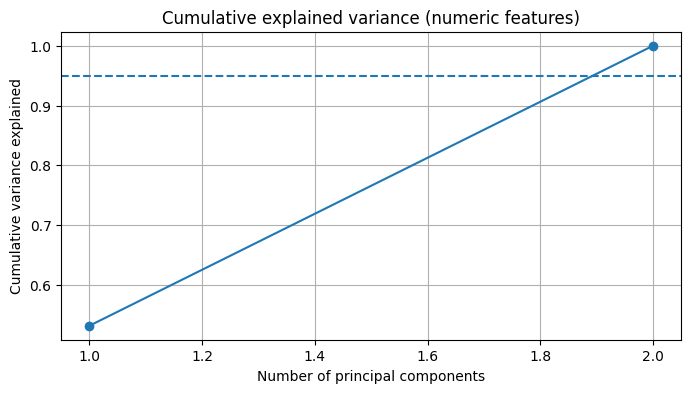

ROC-AUC with PCA: 0.8719


In [90]:
# import

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Quick exploratory PCA on the numeric features only
# Scale → PCA 
X_num_scaled = StandardScaler().fit_transform(X_train[numeric_cols])
pca_full     = PCA().fit(X_num_scaled)          # keeps all components

# Scree / cumulative-variance plot
plt.figure(figsize=(8, 4))
plt.plot(
    np.arange(1, len(pca_full.explained_variance_ratio_) + 1),
    np.cumsum(pca_full.explained_variance_ratio_),
    marker="o"
)
plt.axhline(0.95, ls="--")                      # 95 % threshold
plt.title("Cumulative explained variance (numeric features)")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative variance explained")
plt.grid(True)
plt.show()

# Pre-processing pipeline with PCA (keeps ≥95 % variance)
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca",    PCA(n_components=0.95, random_state=42))  # keep enough PCs for 95 %
])

preproc_pca = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_cols),
    ("bin", "passthrough",      binary_cols)
])

# Re-build one model pipeline using the PCA pre-processor

pipe_pca = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42, k_neighbors=5)),
    ("prep",  preproc_pca),                # <-- swapped-in pre-proc
    ("clf",   models[best_name])           # e.g. your best classifier
])

# Fit and evaluate just like before:
pipe_pca.fit(X_train, y_train)
y_pred_pca  = pipe_pca.predict(X_test)
y_proba_pca = pipe_pca.predict_proba(X_test)[:, 1]

print("ROC-AUC with PCA:",
      roc_auc_score(y_test, y_proba_pca).round(4))


In [91]:
# 2. Imports
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import (roc_auc_score, average_precision_score, accuracy_score,
                             precision_score, recall_score, f1_score, confusion_matrix, 
                             classification_report)
from sklearn.inspection import permutation_importance

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

import shap
import matplotlib.pyplot as plt

# 3. Load data and feature engineering
# You must have a working SQLAlchemy engine called 'engine'
# Example: engine = create_engine("sqlite:///your_database.db")
with engine.connect() as conn:
    df = pd.read_sql("SELECT * FROM PF", con=conn.connection)
df.head()

##### Feature Engineering #####
df['cigduringpregnancy'] = (
    df[['cig1sttrimester','cig2ndtrimester','cig3rdtrimester']]
    .any(axis=1)
    .astype(int)
)
df['tobaccousagepregnancy'] = (
    df['cigduringpregnancy'].fillna(0).astype(int)
    | df['tobaccousage'].fillna(0).astype(int)
)
df = df.drop(columns=[
    'cig1sttrimester','cig2ndtrimester','cig3rdtrimester',
    'cigduringpregnancy','tobaccousage'
])

# Handle binary object columns
binary_obj_cols = [c for c in df.columns if df[c].dtype == 'object' and set(df[c].unique()) <= {0,1,'0','1'}]
for col in binary_obj_cols:
    df[col] = df[col].astype(int)

# Convert mothersage to integer
if df['mothersage'].dtype != 'int64':
    df['mothersage'] = pd.to_numeric(df['mothersage'], errors='coerce').astype('int64')

# Ensure integer columns
int_cols = ['cigbeforepregnancy', 'monthprenatalcare', 'target']
for col in int_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

df.drop_duplicates(inplace=True)

# Split data into features and target
y = df['target']
X = df.drop(columns=['target']).copy()

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define numeric vs binary features
numeric_cols = [c for c in X.columns if X[c].nunique() > 10]
binary_cols = [c for c in X.columns if c not in numeric_cols]

# Build preprocessing pipeline
preproc = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('bin', 'passthrough', binary_cols)
])

# Define BOOTSTRAPPED versions of all models
base_models = {
    'LogisticRegression': LogisticRegression(
        max_iter=1000, class_weight='balanced',
        solver='saga', penalty='elasticnet', l1_ratio=0.5,
        random_state=42),
    'RandomForest': RandomForestClassifier(
        class_weight='balanced',
        max_depth=None,
        random_state=42),
    'GradientBoosting': GradientBoostingClassifier(
        random_state=42)
}

models = {
    f'Bootstrapped_{name}': BaggingClassifier(
        estimator=model,
        n_estimators=50,
        bootstrap=True,  
        bootstrap_features=False,  
        random_state=42,
        n_jobs=-1
    )
    for name, model in base_models.items()
}

# Cross-validation setup
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
scoring = {'roc_auc': 'roc_auc', 'pr_auc': 'average_precision'}

# Benchmark models using cross-validation with SMOTE
results = {}
for name, clf in models.items():
    pipe = ImbPipeline(steps=[
        ('prep', preproc),  # Preprocess first
        ('smote', SMOTE(random_state=42, k_neighbors=5)),  # Then balance
        ('clf', clf)  # Then bootstrapped model
    ])
    cv_out = cross_validate(
        pipe, X_train, y_train, cv=cv, scoring=scoring,
        return_estimator=True, n_jobs=-1
    )
    results[name] = {
        'roc_auc_mean': np.mean(cv_out['test_roc_auc']),
        'roc_auc_sd': np.std(cv_out['test_roc_auc']),
        'pr_auc_mean': np.mean(cv_out['test_pr_auc']),
        'pr_auc_sd': np.std(cv_out['test_pr_auc'])
    }
    print(
        f"{name}: ROC-AUC {results[name]['roc_auc_mean']:.3f}±{results[name]['roc_auc_sd']:.3f}, "
        f"PR-AUC  {results[name]['pr_auc_mean']:.3f}±{results[name]['pr_auc_sd']:.3f}"
    )

# Select and evaluate best model on TEST SET (Sensitivity label)
best_name = max(results, key=lambda k: results[k]['pr_auc_mean'])
print(f"\nBest model for final evaluation: {best_name}")

# Fit best model on full training data
best_pipe = ImbPipeline(steps=[
    ('prep', preproc),
    ('smote', SMOTE(random_state=42, k_neighbors=5)),
    ('clf', models[best_name])
])
best_pipe.fit(X_train, y_train)

# Generate predictions
y_pred = best_pipe.predict(X_test)
y_proba = best_pipe.predict_proba(X_test)[:, 1]

# Calculate metrics - CHANGED 'Recall' TO 'Sensitivity'
test_metrics = {
    "ROC-AUC": roc_auc_score(y_test, y_proba),
    "PR-AUC": average_precision_score(y_test, y_proba),
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Sensitivity": recall_score(y_test, y_pred),  # Changed key name here
    "F1": f1_score(y_test, y_pred),
    "Confusion Matrix": confusion_matrix(y_test, y_pred),
    "Classification Report": classification_report(y_test, y_pred)
}

# Print results (unchanged except label)
print("\nFinal Test Set Performance:")
for metric, value in test_metrics.items():
    if metric in ["Confusion Matrix", "Classification Report"]:
        print(f"\n{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")

# # Optional: SHAP analysis for tree-based models
# if 'RandomForest' in best_name or 'GradientBoosting' in best_name:
#     # Get preprocessed training data
#     X_train_preprocessed = best_pipe.named_steps['prep'].transform(X_train)
#     # Apply SMOTE to get balanced data for SHAP
#     X_train_balanced, y_train_balanced = best_pipe.named_steps['smote'].fit_resample(X_train_preprocessed, y_train)
#     # Sample for SHAP (for efficiency)
#     sample_idx = np.random.choice(X_train_balanced.shape[0], size=min(1000, X_train_balanced.shape[0]), replace=False)
#     X_sample = X_train_balanced[sample_idx]
#     # Get feature names
#     feature_names = numeric_cols + binary_cols
#     # Create explainer (using one of the base estimators from the bagging ensemble)
#     base_estimator = best_pipe.named_steps['clf'].estimator_
#     explainer = shap.TreeExplainer(base_estimator)
#     shap_values = explainer.shap_values(X_sample)
#     # Plot summary
#     shap.summary_plot(shap_values, X_sample, feature_names=feature_names)
#     plt.title(f'SHAP Summary Plot for {best_name}')
#     plt.show()

/tmp/ipykernel_2906327/1148959146.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM PF", con=conn.connection)


Bootstrapped_LogisticRegression: ROC-AUC 0.769±0.069, PR-AUC  0.096±0.022
Bootstrapped_RandomForest: ROC-AUC 0.728±0.056, PR-AUC  0.090±0.026
Bootstrapped_GradientBoosting: ROC-AUC 0.759±0.074, PR-AUC  0.184±0.062

Best model for final evaluation: Bootstrapped_GradientBoosting

Final Test Set Performance:
ROC-AUC: 0.8814
PR-AUC: 0.2779
Accuracy: 0.9371
Precision: 0.1818
Sensitivity: 0.7143
F1: 0.2899

Confusion Matrix:
[[1439   90]
 [   8   20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1529
           1       0.18      0.71      0.29        28

    accuracy                           0.94      1557
   macro avg       0.59      0.83      0.63      1557
weighted avg       0.98      0.94      0.95      1557



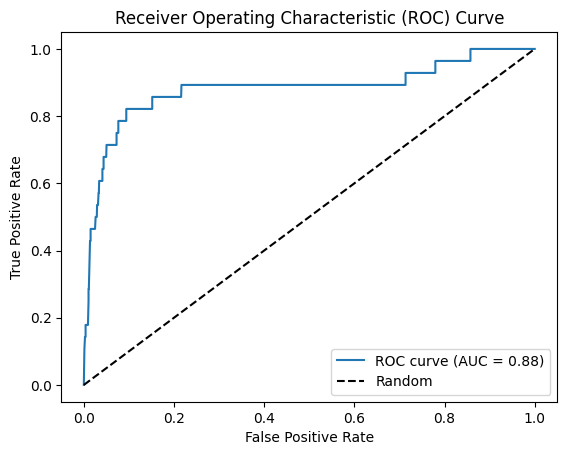

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# y_test: true labels, y_proba: predicted probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

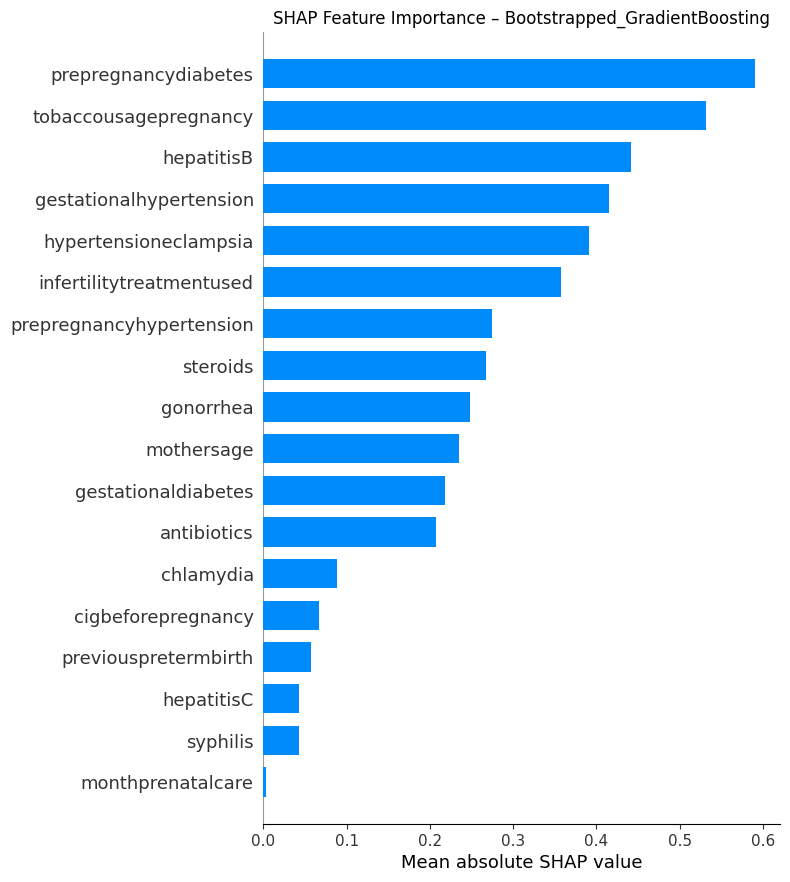

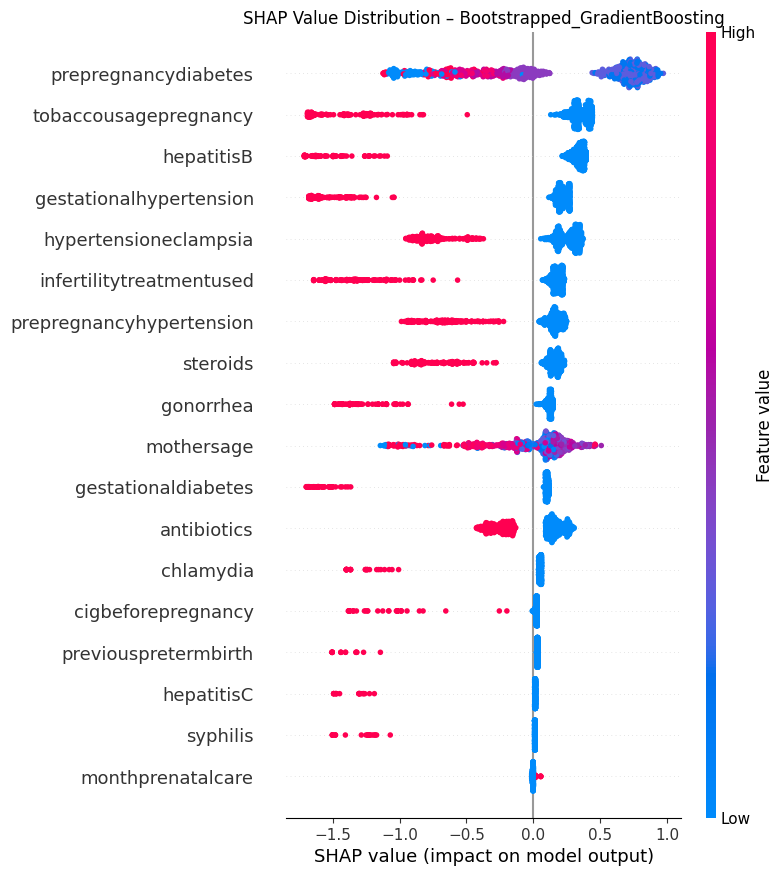

In [93]:
# SHAP analysis with proper pipeline handling
# Use training data for SHAP analysis (never test data)
X_train_preprocessed = best_pipe.named_steps['prep'].transform(X_train)

# Get the actual model (unwrap BaggingClassifier if needed)
model_for_shap = best_pipe.named_steps['clf']
if isinstance(model_for_shap, BaggingClassifier):
    # For bagged models, use first estimator from the ensemble
    model_for_shap = model_for_shap.estimators_[0]

# Create appropriate explainer for model type
if hasattr(model_for_shap, 'coef_'):  # Linear models
    explainer = shap.LinearExplainer(
        model_for_shap, 
        X_train_preprocessed,
        feature_perturbation="interventional",
        feature_names=X.columns.tolist()  # Use original feature names
    )
else:  # Tree-based models
    explainer = shap.Explainer(
        model_for_shap,
        X_train_preprocessed,
        feature_names=X.columns.tolist()
    )

# Calculate SHAP values (use subset for efficiency)
shap_values = explainer(X_train_preprocessed[:1000])  # Use first 1000 samples

# Global feature importance plot
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values, 
    features=X_train_preprocessed[:1000],
    feature_names=X.columns.tolist(),
    plot_type='bar',
    show=False
)
plt.title(f"SHAP Feature Importance – {best_name}")
plt.xlabel("Mean absolute SHAP value")
plt.show()

# Optional: Detailed beeswarm plot
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values,
    features=X_train_preprocessed[:1000],
    feature_names=X.columns.tolist(),
    show=False
)
plt.title(f"SHAP Value Distribution – {best_name}")
plt.show()